<a href="https://colab.research.google.com/github/Hemanth4247/Employee-Attrition-Analysis-and-Prediction-Using-Supervised-ML/blob/main/mortage%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")

data = pd.read_csv('/content/LoanExport.csv')
data.head(20)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


**## Defining Needed Functions for EDA**

In [6]:
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(data[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def draw_boxplot(col):
  sns.boxplot(data[col])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def draw_piechart(col,label):
  plt.figure(figsize=(10,10))
  plt.pie(data[col].value_counts(),shadow=True ,autopct='%.3f',labels=label)
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def draw_scatterplot(col1,col2):
  plt.scatter(data[col1],data[col2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
def calc_linearsummary(feature, target):
  y = data[target]
  x = data[feature]
  x = sm.add_constant(x)
  model = sm.OLS(y, x).fit()
  print(model.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def draw_join_plot(colx,coly):
  sns.jointplot(x=colx,y=coly,kind='reg')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
def handle_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower , upper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
def label_encoding(col):
  label_encoder = preprocessing.LabelEncoder()
  data[col]= label_encoder.fit_transform(data[col])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def one_hot_encoding(cols):
  one_hot_encoded_data = pd.get_dummies(data, columns = cols)
  return one_hot_encoded_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**## Data Preprocessing & EDA**

In [15]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(16552, 28)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16552 entries, 0 to 16551
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         16552 non-null  int64  
 1   FirstPaymentDate    16552 non-null  int64  
 2   FirstTimeHomebuyer  16552 non-null  object 
 3   MaturityDate        16552 non-null  int64  
 4   MSA                 16552 non-null  object 
 5   MIP                 16552 non-null  int64  
 6   Units               16552 non-null  int64  
 7   Occupancy           16552 non-null  object 
 8   OCLTV               16552 non-null  int64  
 9   DTI                 16552 non-null  int64  
 10  OrigUPB             16552 non-null  int64  
 11  LTV                 16552 non-null  int64  
 12  OrigInterestRate    16552 non-null  float64
 13  Channel             16552 non-null  object 
 14  PPM                 16552 non-null  object 
 15  ProductType         16552 non-null  object 
 16  Prop

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore              0
FirstPaymentDate         0
FirstTimeHomebuyer       0
MaturityDate             0
MSA                      0
MIP                      0
Units                    0
Occupancy                0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
Channel                  0
PPM                      0
ProductType              0
PropertyState            0
PropertyType             0
PostalCode               0
LoanSeqNum               0
LoanPurpose              0
OrigLoanTerm             0
NumBorrowers             0
SellerName            1441
ServicerName             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
dtype: int64

In [18]:
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             0
FirstPaymentDate        0
FirstTimeHomebuyer      0
MaturityDate            0
MSA                     0
MIP                     0
Units                   0
Occupancy               0
OCLTV                   0
DTI                     0
OrigUPB                 0
LTV                     0
OrigInterestRate        0
Channel                 0
PPM                     0
ProductType             0
PropertyState           0
PropertyType            0
PostalCode              0
LoanSeqNum              0
LoanPurpose             0
OrigLoanTerm            0
NumBorrowers            0
SellerName            782
ServicerName            1
EverDelinquent          1
MonthsDelinquent        1
MonthsInRepayment       1
dtype: int64

In [ ]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode              int64
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent        float64
MonthsDelinquent      float64
MonthsInRepayment     float64
dtype: object

In [ ]:
# Convert date feature to datetime format
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288 entries, 0 to 8287
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CreditScore         8288 non-null   int64         
 1   FirstPaymentDate    8288 non-null   datetime64[ns]
 2   FirstTimeHomebuyer  8288 non-null   object        
 3   MaturityDate        8288 non-null   datetime64[ns]
 4   MSA                 8288 non-null   object        
 5   MIP                 8288 non-null   int64         
 6   Units               8288 non-null   int64         
 7   Occupancy           8288 non-null   object        
 8   OCLTV               8288 non-null   int64         
 9   DTI                 8288 non-null   int64         
 10  OrigUPB             8288 non-null   int64         
 11  LTV                 8288 non-null   int64         
 12  OrigInterestRate    8288 non-null   float64       
 13  Channel             8288 non-null   object      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore                    int64
FirstPaymentDate               int64
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
LTV                            int64
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                     int64
LoanSeqNum                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
M

In [20]:
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: time data "2029-01-01 00:00:00" doesn't match format "%Y%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [21]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore              0
FirstPaymentDate         0
FirstTimeHomebuyer       0
MaturityDate             0
MSA                      0
MIP                      0
Units                    0
Occupancy                0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
Channel                  0
PPM                      0
ProductType              0
PropertyState            0
PropertyType             0
PostalCode               0
LoanSeqNum               0
LoanPurpose              0
OrigLoanTerm             0
NumBorrowers             0
SellerName            1441
ServicerName             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
dtype: int64

In [22]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore                    int64
FirstPaymentDate               int64
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
LTV                            int64
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                     int64
LoanSeqNum                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
M

In [23]:
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: time data "2029-01-01 00:00:00" doesn't match format "%Y%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [24]:
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16552 entries, 0 to 16551
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CreditScore         16552 non-null  int64         
 1   FirstPaymentDate    16552 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  16552 non-null  object        
 3   MaturityDate        16552 non-null  datetime64[ns]
 4   MSA                 16552 non-null  object        
 5   MIP                 16552 non-null  int64         
 6   Units               16552 non-null  int64         
 7   Occupancy           16552 non-null  object        
 8   OCLTV               16552 non-null  int64         
 9   DTI                 16552 non-null  int64         
 10  OrigUPB             16552 non-null  int64         
 11  LTV                 16552 non-null  int64         
 12  OrigInterestRate    16552 non-null  float64       
 13  Channel             16552 non-null  object    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#View description of all of our features
num1_cols = data.describe(include='all')
num1_cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,16552.000000,16552,16552,16552,16552,16552.000000,16552.000000,16552,16552.000000,16552.000000,...,16552.000000,16552,16552,16552.000000,16552,15111,16552,16552.000000,16552.000000,16552.000000
unique,NaN,NaN,3,NaN,382,NaN,NaN,3,NaN,NaN,...,NaN,16552,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,...,NaN,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,9851,NaN,2421,NaN,NaN,15997,NaN,NaN,...,NaN,1,7057,NaN,10683,4330,4165,NaN,NaN,NaN
mean,557.343886,1999-04-07 04:56:45.123247872,NaN,2029-03-01 11:53:59.826002944,NaN,13.005498,1.024770,NaN,81.222994,30.673635,...,53911.001692,NaN,NaN,359.771750,NaN,NaN,NaN,0.438316,6.388956,63.281054
min,0.000000,1999-02-01 00:00:00,NaN,2024-09-01 00:00:00,NaN,0.000000,1.000000,NaN,7.000000,0.000000,...,600.000000,NaN,NaN,306.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,584.000000,1999-03-01 00:00:00,NaN,2029-02-01 00:00:00,NaN,0.000000,1.000000,NaN,75.000000,24.000000,...,30000.000000,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,33.000000
50%,607.000000,1999-04-01 00:00:00,NaN,2029-03-01 00:00:00,NaN,12.000000,1.000000,NaN,80.000000,32.000000,...,48800.000000,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,49.000000
75%,618.000000,1999-05-01 00:00:00,NaN,2029-04-01 00:00:00,NaN,25.000000,1.000000,NaN,90.000000,39.000000,...,84000.000000,NaN,NaN,360.000000,NaN,NaN,NaN,1.000000,4.000000,68.000000
max,625.000000,2003-08-01 00:00:00,NaN,2031-01-01 00:00:00,NaN,52.000000,4.000000,NaN,103.000000,65.000000,...,99700.000000,NaN,NaN,360.000000,NaN,NaN,NaN,1.000000,180.000000,212.000000


In [27]:
#Count number of distinct elements in axis 0.
data.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             160
FirstPaymentDate         39
FirstTimeHomebuyer        3
MaturityDate             61
MSA                     382
MIP                      21
Units                     4
Occupancy                 3
OCLTV                    87
DTI                      66
OrigUPB                 288
LTV                      86
OrigInterestRate         83
Channel                   4
PPM                       3
ProductType               1
PropertyState            53
PropertyType              6
PostalCode              809
LoanSeqNum            16552
LoanPurpose               3
OrigLoanTerm             47
NumBorrowers              3
SellerName               20
ServicerName             20
EverDelinquent            2
MonthsDelinquent        157
MonthsInRepayment       212
dtype: int64

In [28]:
data["EverDelinquent"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EverDelinquent
0    9297
1    7255
Name: count, dtype: int64

In [29]:
print("Seller Name size: \n",data.SellerName.value_counts(),"\n\n")

Seller Name size: 
 SellerName
Ot    4330
NO    1566
ST    1212
CO    1128
FI    1099
FL    1044
GM     558
BI     486
WA     485
BA     481
FT     408
OL     389
PR     382
CH     349
AC     266
CR     252
PN     216
HO     201
G      163
RE      96
Name: count, dtype: int64 




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#Return unique values based on a hash table.
data['FirstTimeHomebuyer'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['N', 'X', 'Y'], dtype=object)

In [31]:
data['PPM'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['N', 'X', 'Y'], dtype=object)

In [32]:
data['NumBorrowers'].unique()
# X  means unknown value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['2', '1', 'X '], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

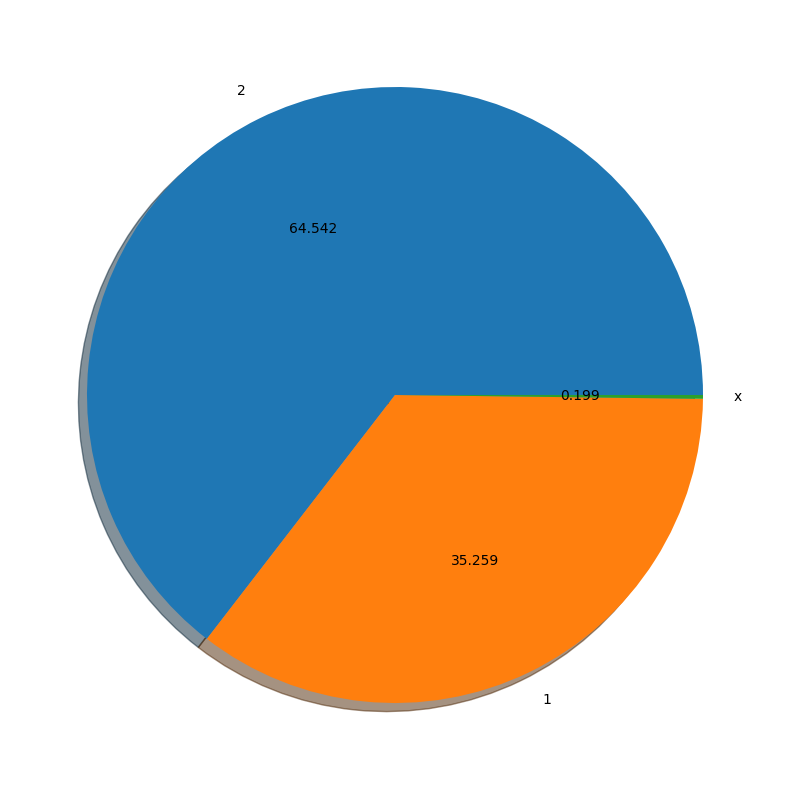

In [33]:
#draw piechart of NumBorrowers to see the distribution of its values
label_arr=['2','1','x']
draw_piechart('NumBorrowers',label_arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


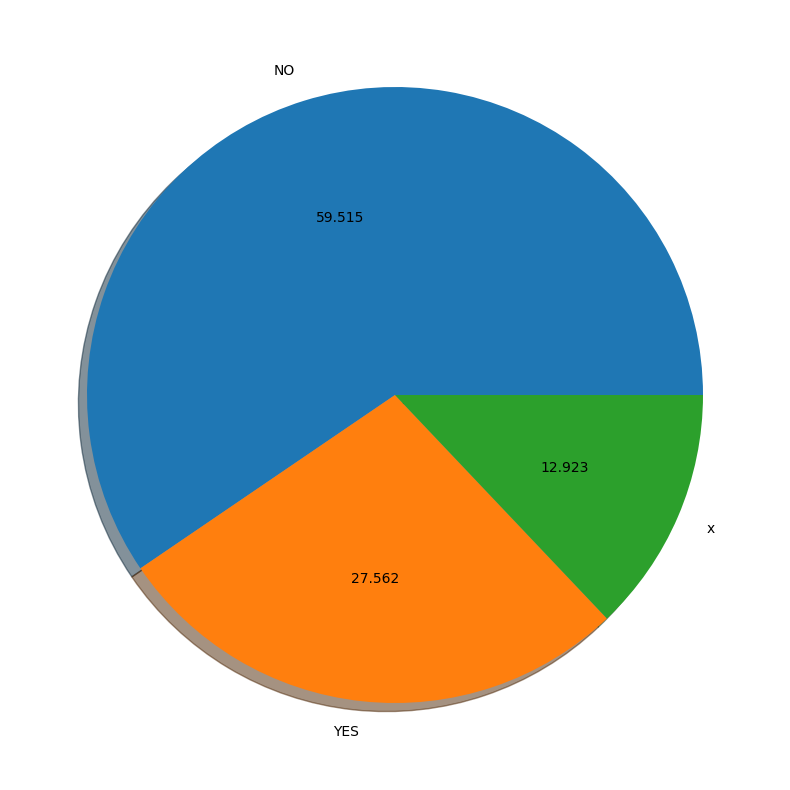

In [34]:
#draw piechart of FirstTimeHomebuyer to see the distribution of its values

label_arr=['NO','YES','x']
draw_piechart('FirstTimeHomebuyer',label_arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


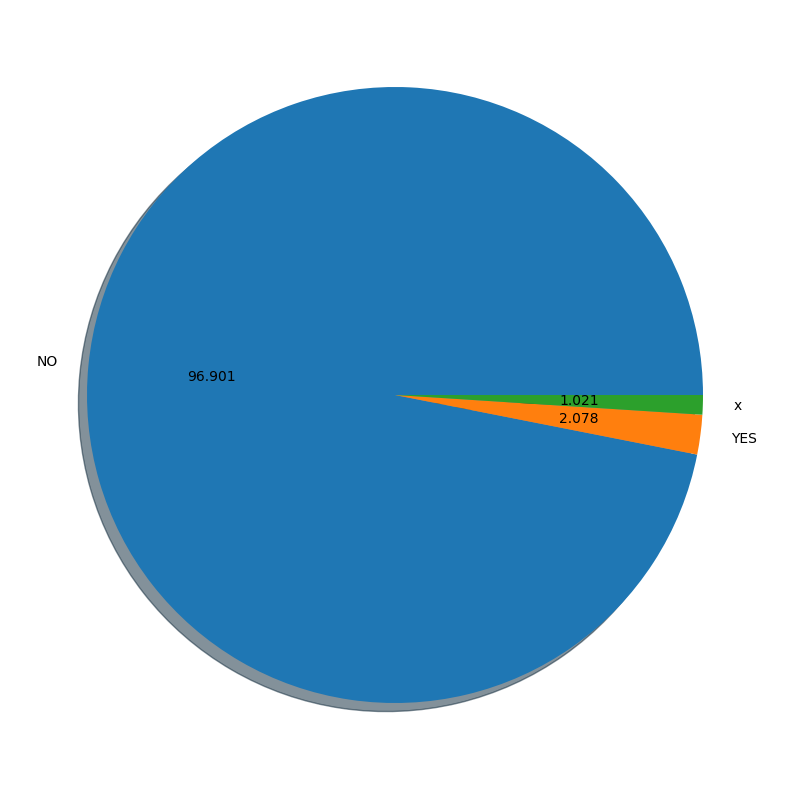

In [35]:
#draw piechart of PPM to see the distribution of its values
label_arr=['NO','YES','x']
draw_piechart('PPM',label_arr)

In [36]:
data['Occupancy'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['O', 'I', 'S'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


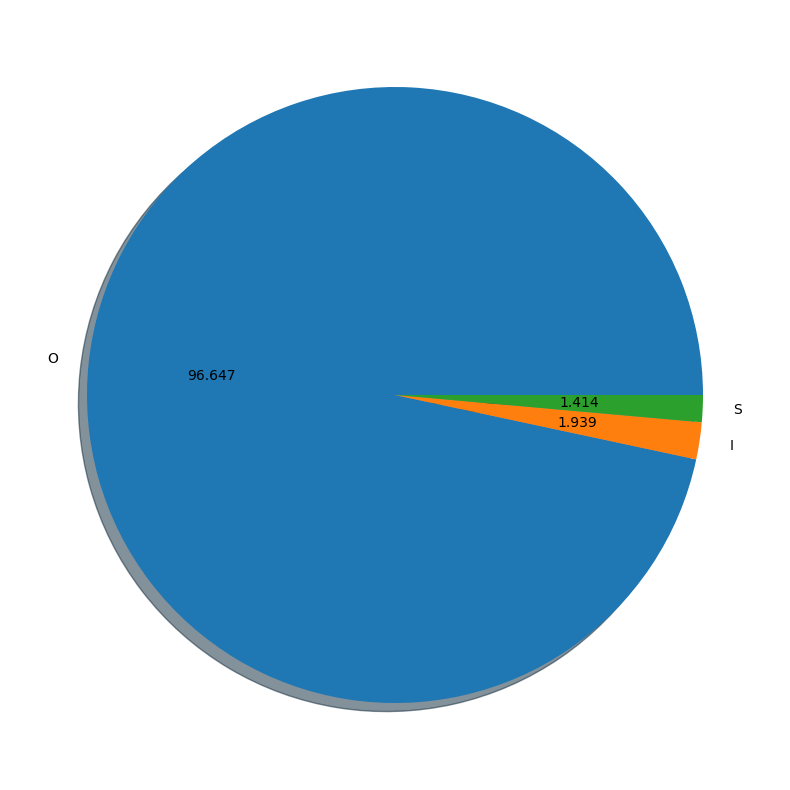

In [37]:
#draw piechart of Occupancy to see the distribution of its values
label_arr=['O','I','S']
draw_piechart('Occupancy',label_arr)

In [38]:
data['PostalCode'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PostalCode
30000    198
85200    186
48100    181
60600    169
94500    168
        ... 
51600      1
41400      1
12700      1
40600      1
12100      1
Name: count, Length: 809, dtype: int64

In [39]:
data['LoanPurpose'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['P', 'N', 'C'], dtype=object)

In [40]:
data['LoanPurpose'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LoanPurpose
P    7057
N    7011
C    2484
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


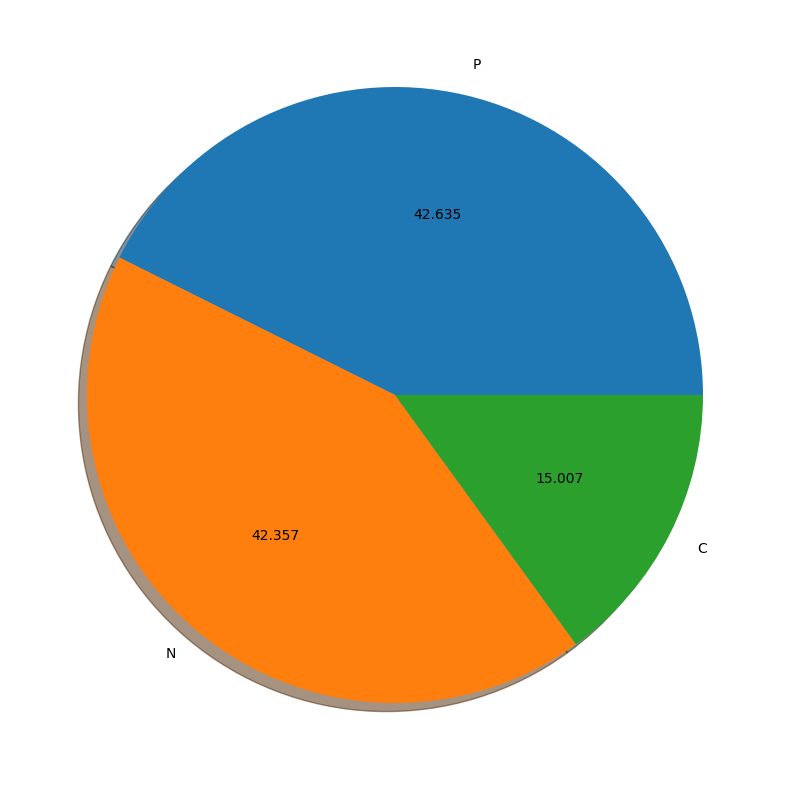

In [41]:
#draw piechart of LoanPurpose to see the distribution of its values

label_arr=['P','N','C']
draw_piechart('LoanPurpose',label_arr)

In [42]:
data['Channel'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['T', 'R', 'C', 'B'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


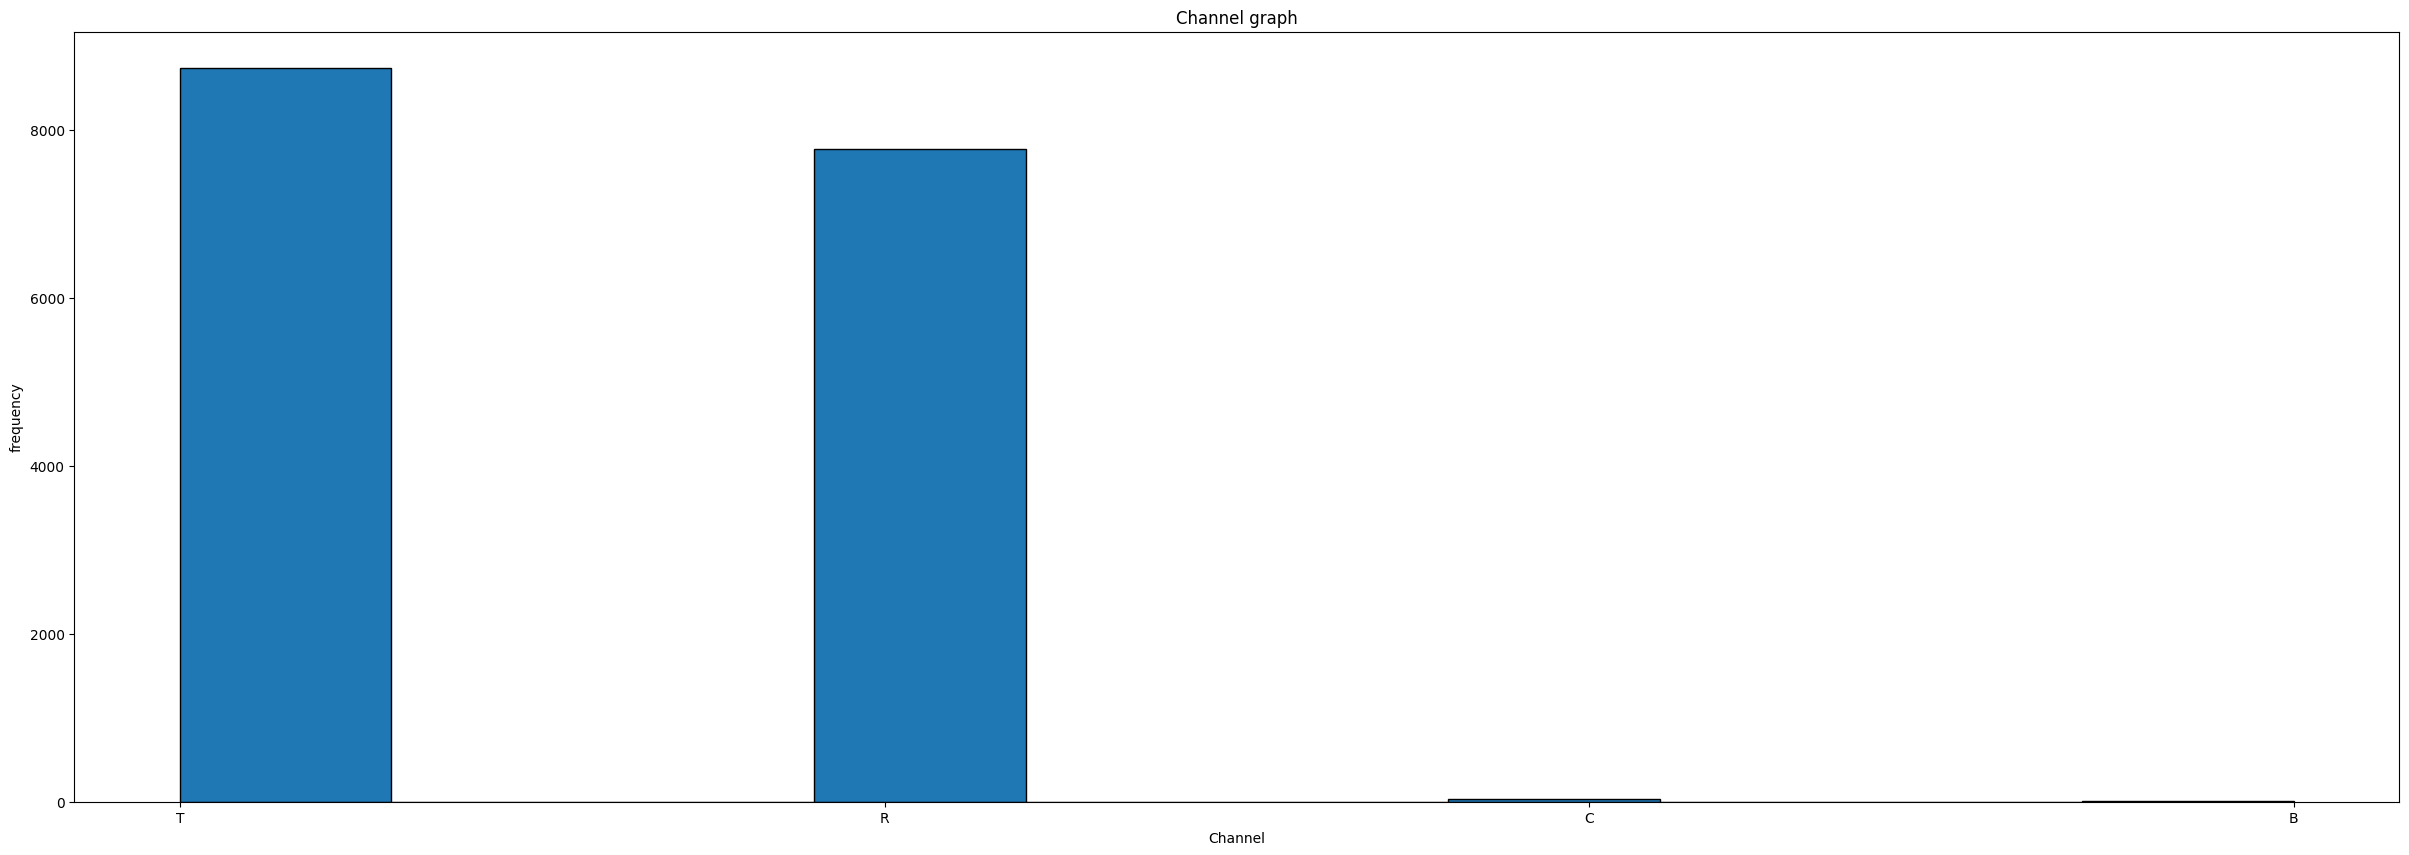

In [43]:
# Draw histogram to know the density of out categorical data: Channel
draw_histogram('Channel','Channel graph','Channel','frequency')

In [44]:
#Convert categorial feature to numerical one by label_encoding function defined earlier
label_encoding('Channel')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
data['PropertyState'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


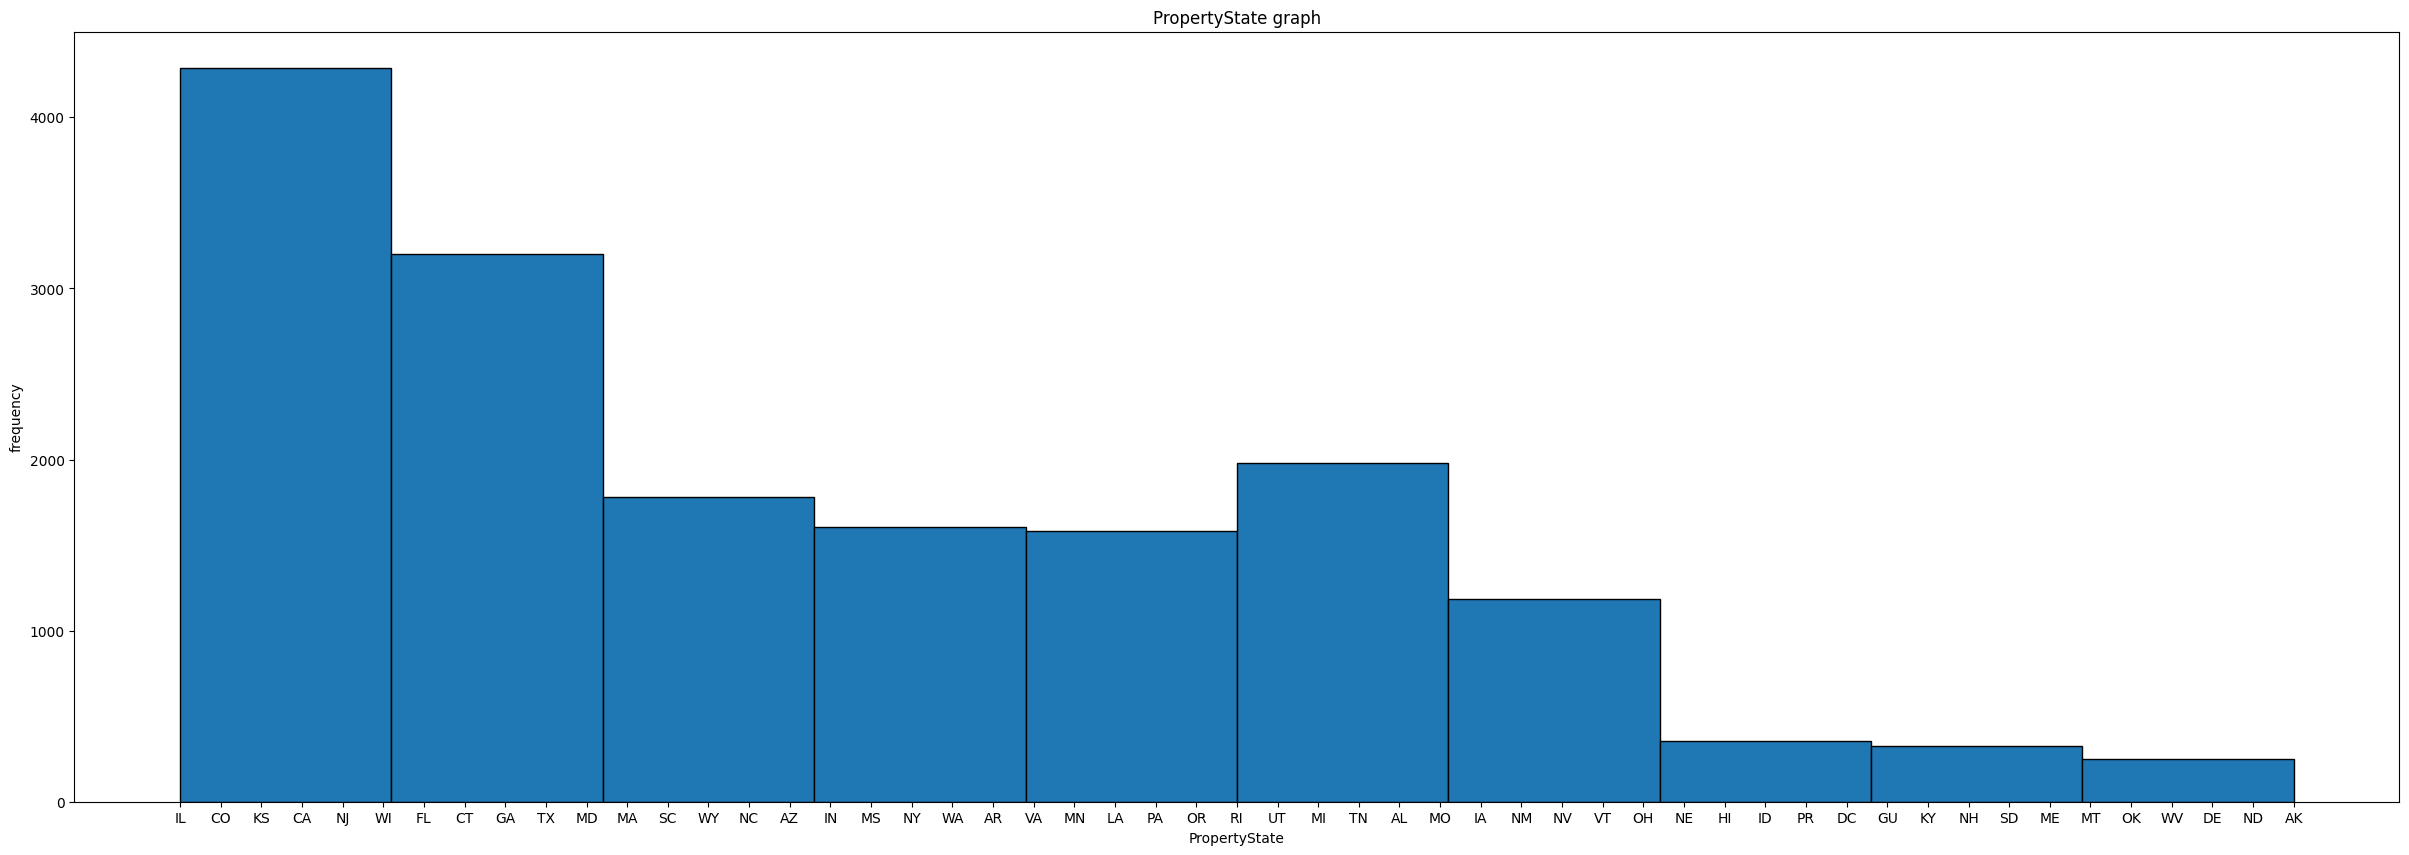

In [46]:
# Draw histogram to know the density of out categorical data: PropertyState
draw_histogram('PropertyState','PropertyState graph','PropertyState','frequency')

In [ ]:
#Convert it to numerical
label_encoding('PropertyState')

In [47]:
data['PropertyType'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


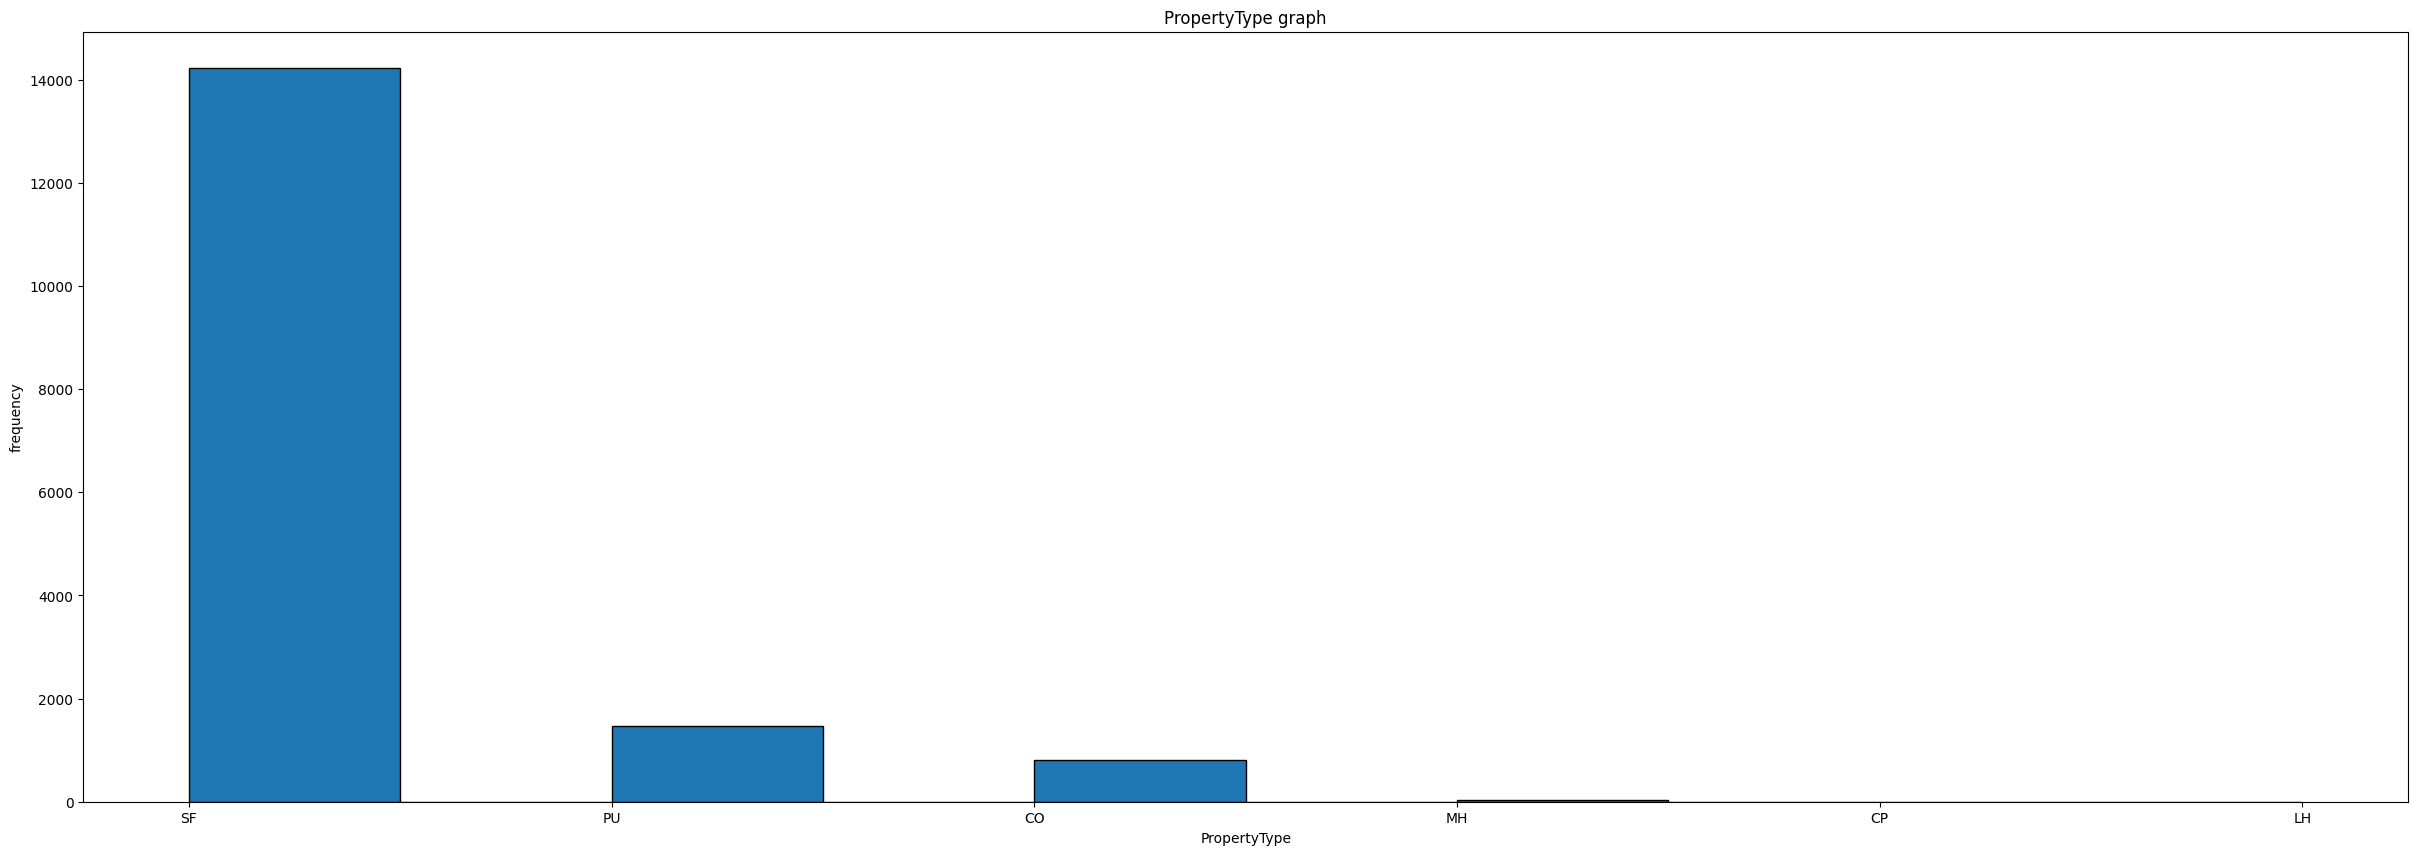

In [48]:
# Draw histogram to know the density of out categorical data: PropertyType

draw_histogram('PropertyType','PropertyType graph','PropertyType','frequency')

In [49]:
#Convert it to numerical
label_encoding('PropertyType')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

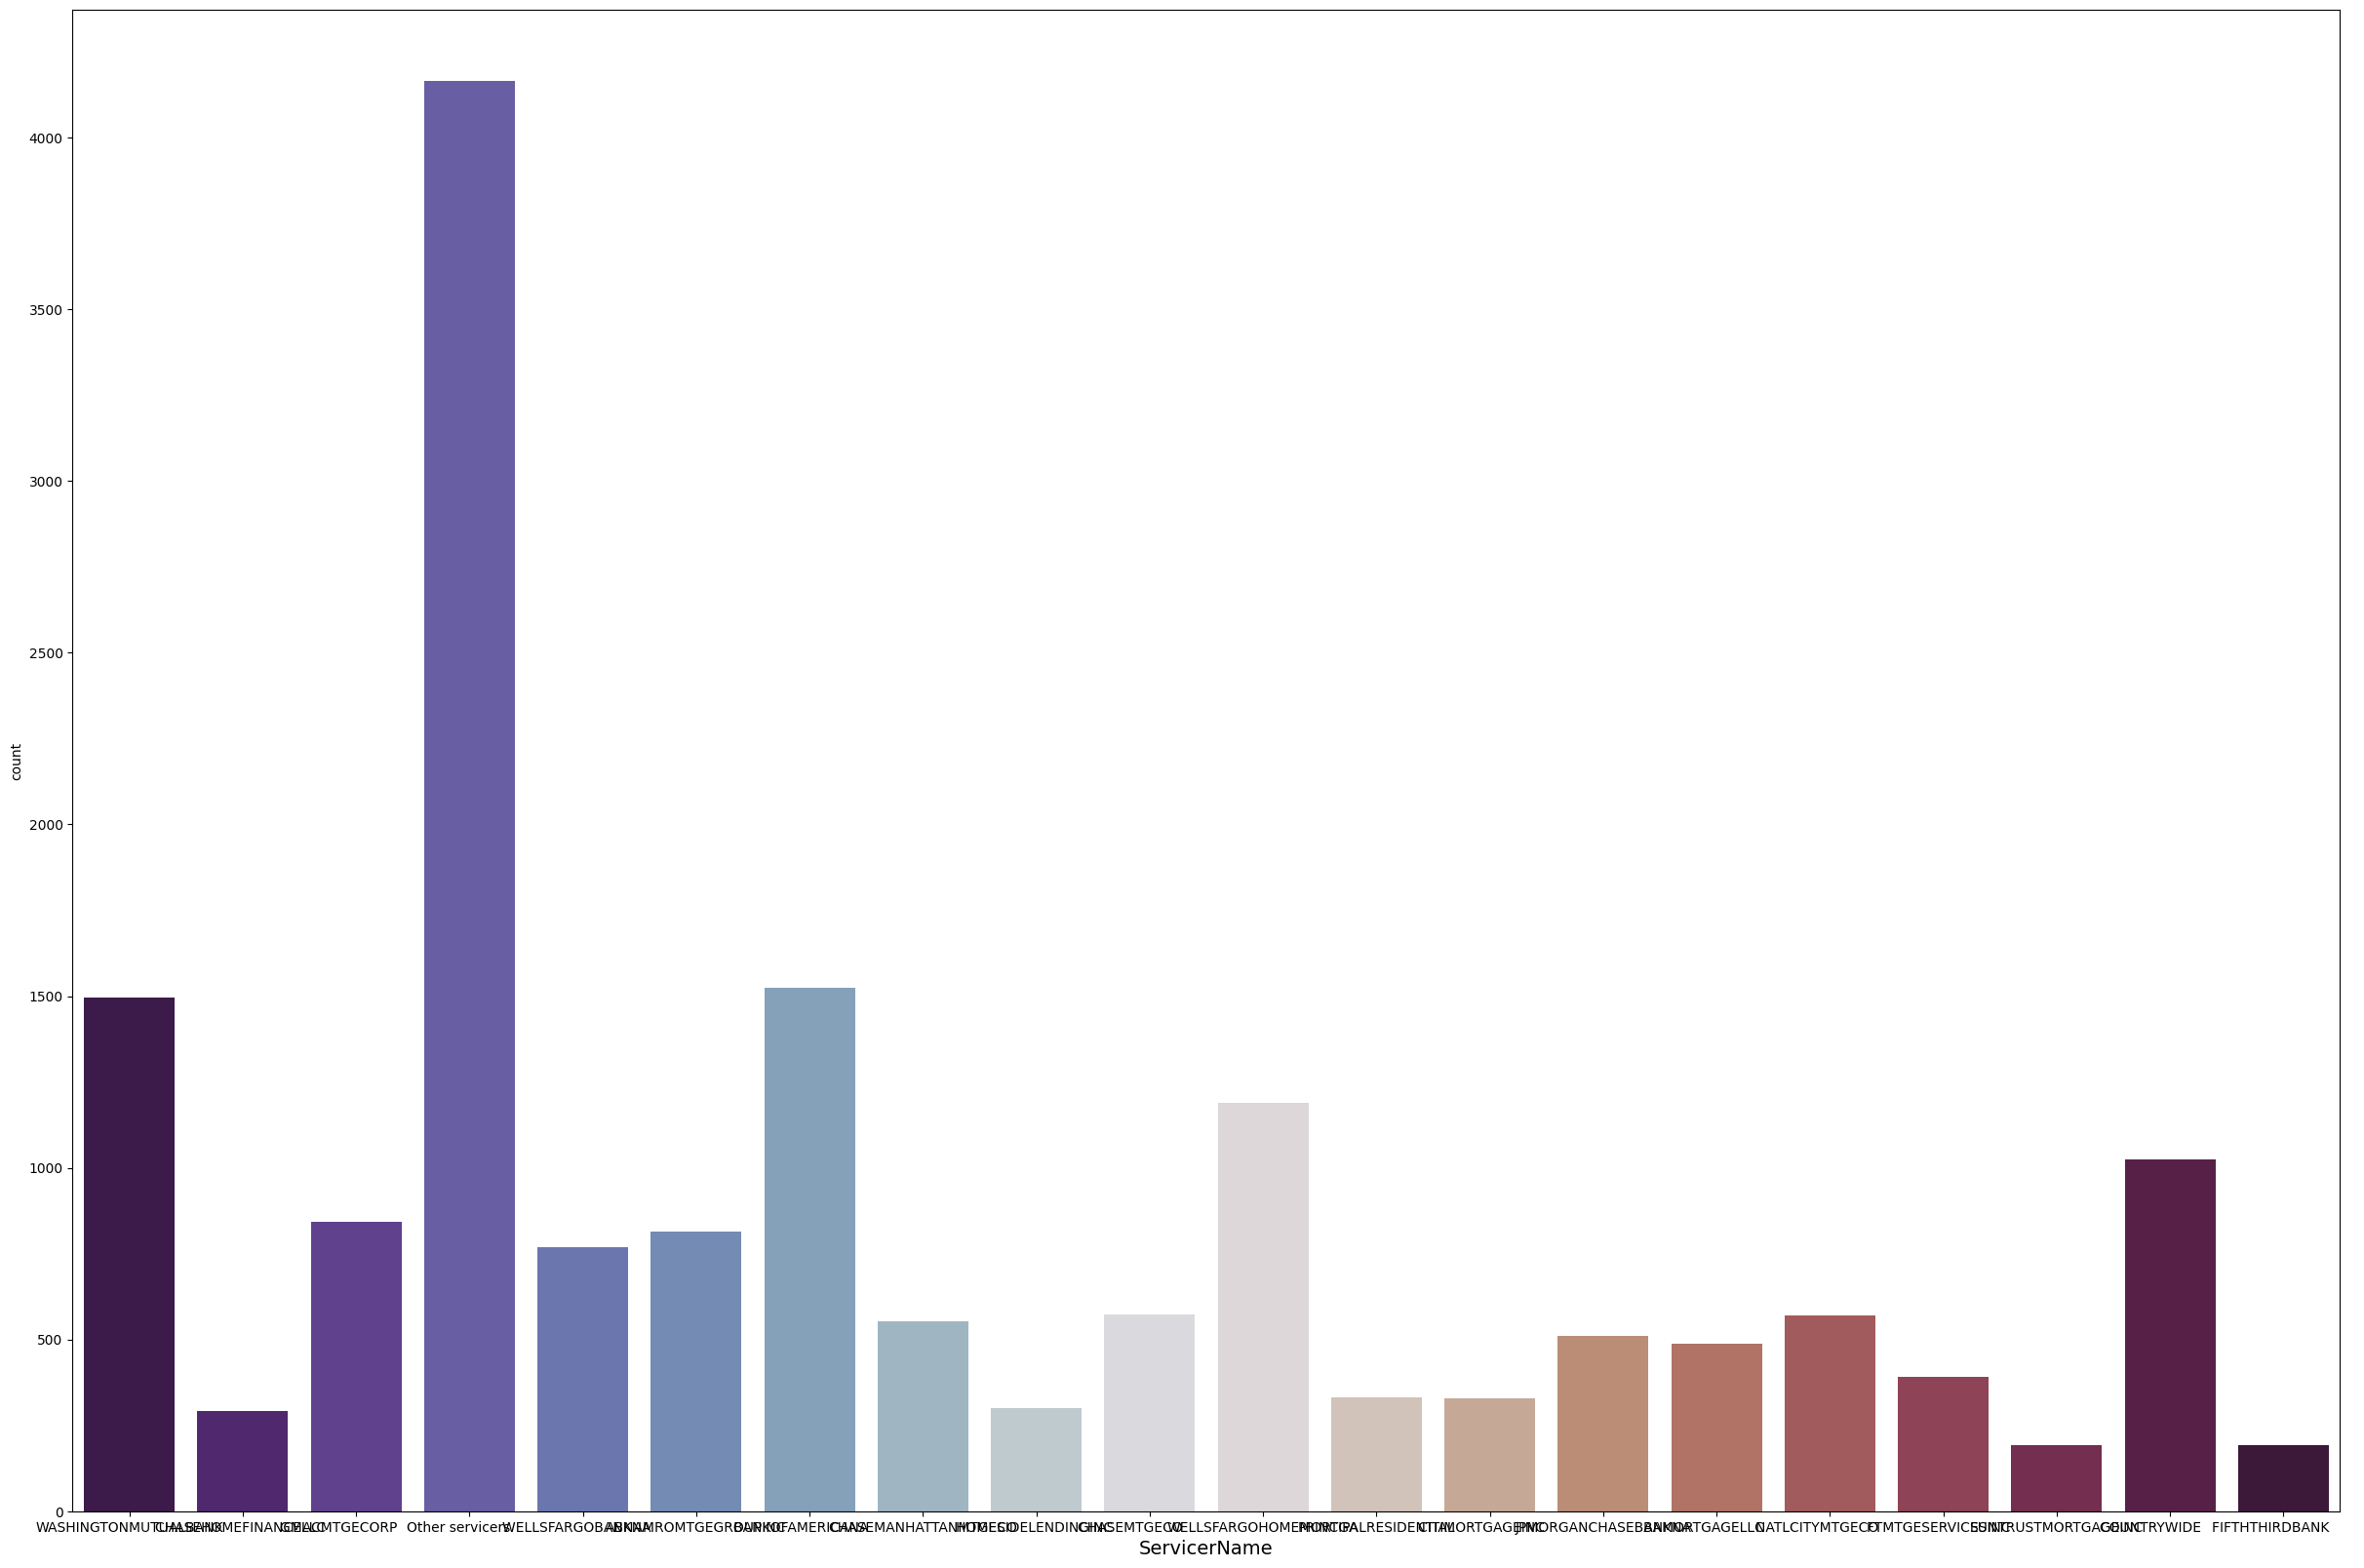

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [50]:
plt.figure(figsize=(30,20))
sns.countplot(x='ServicerName',data=data,palette="twilight_shifted")
plt.xlabel("ServicerName",fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-cd05ca893f83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PropertyState',data=data,palette="autumn")


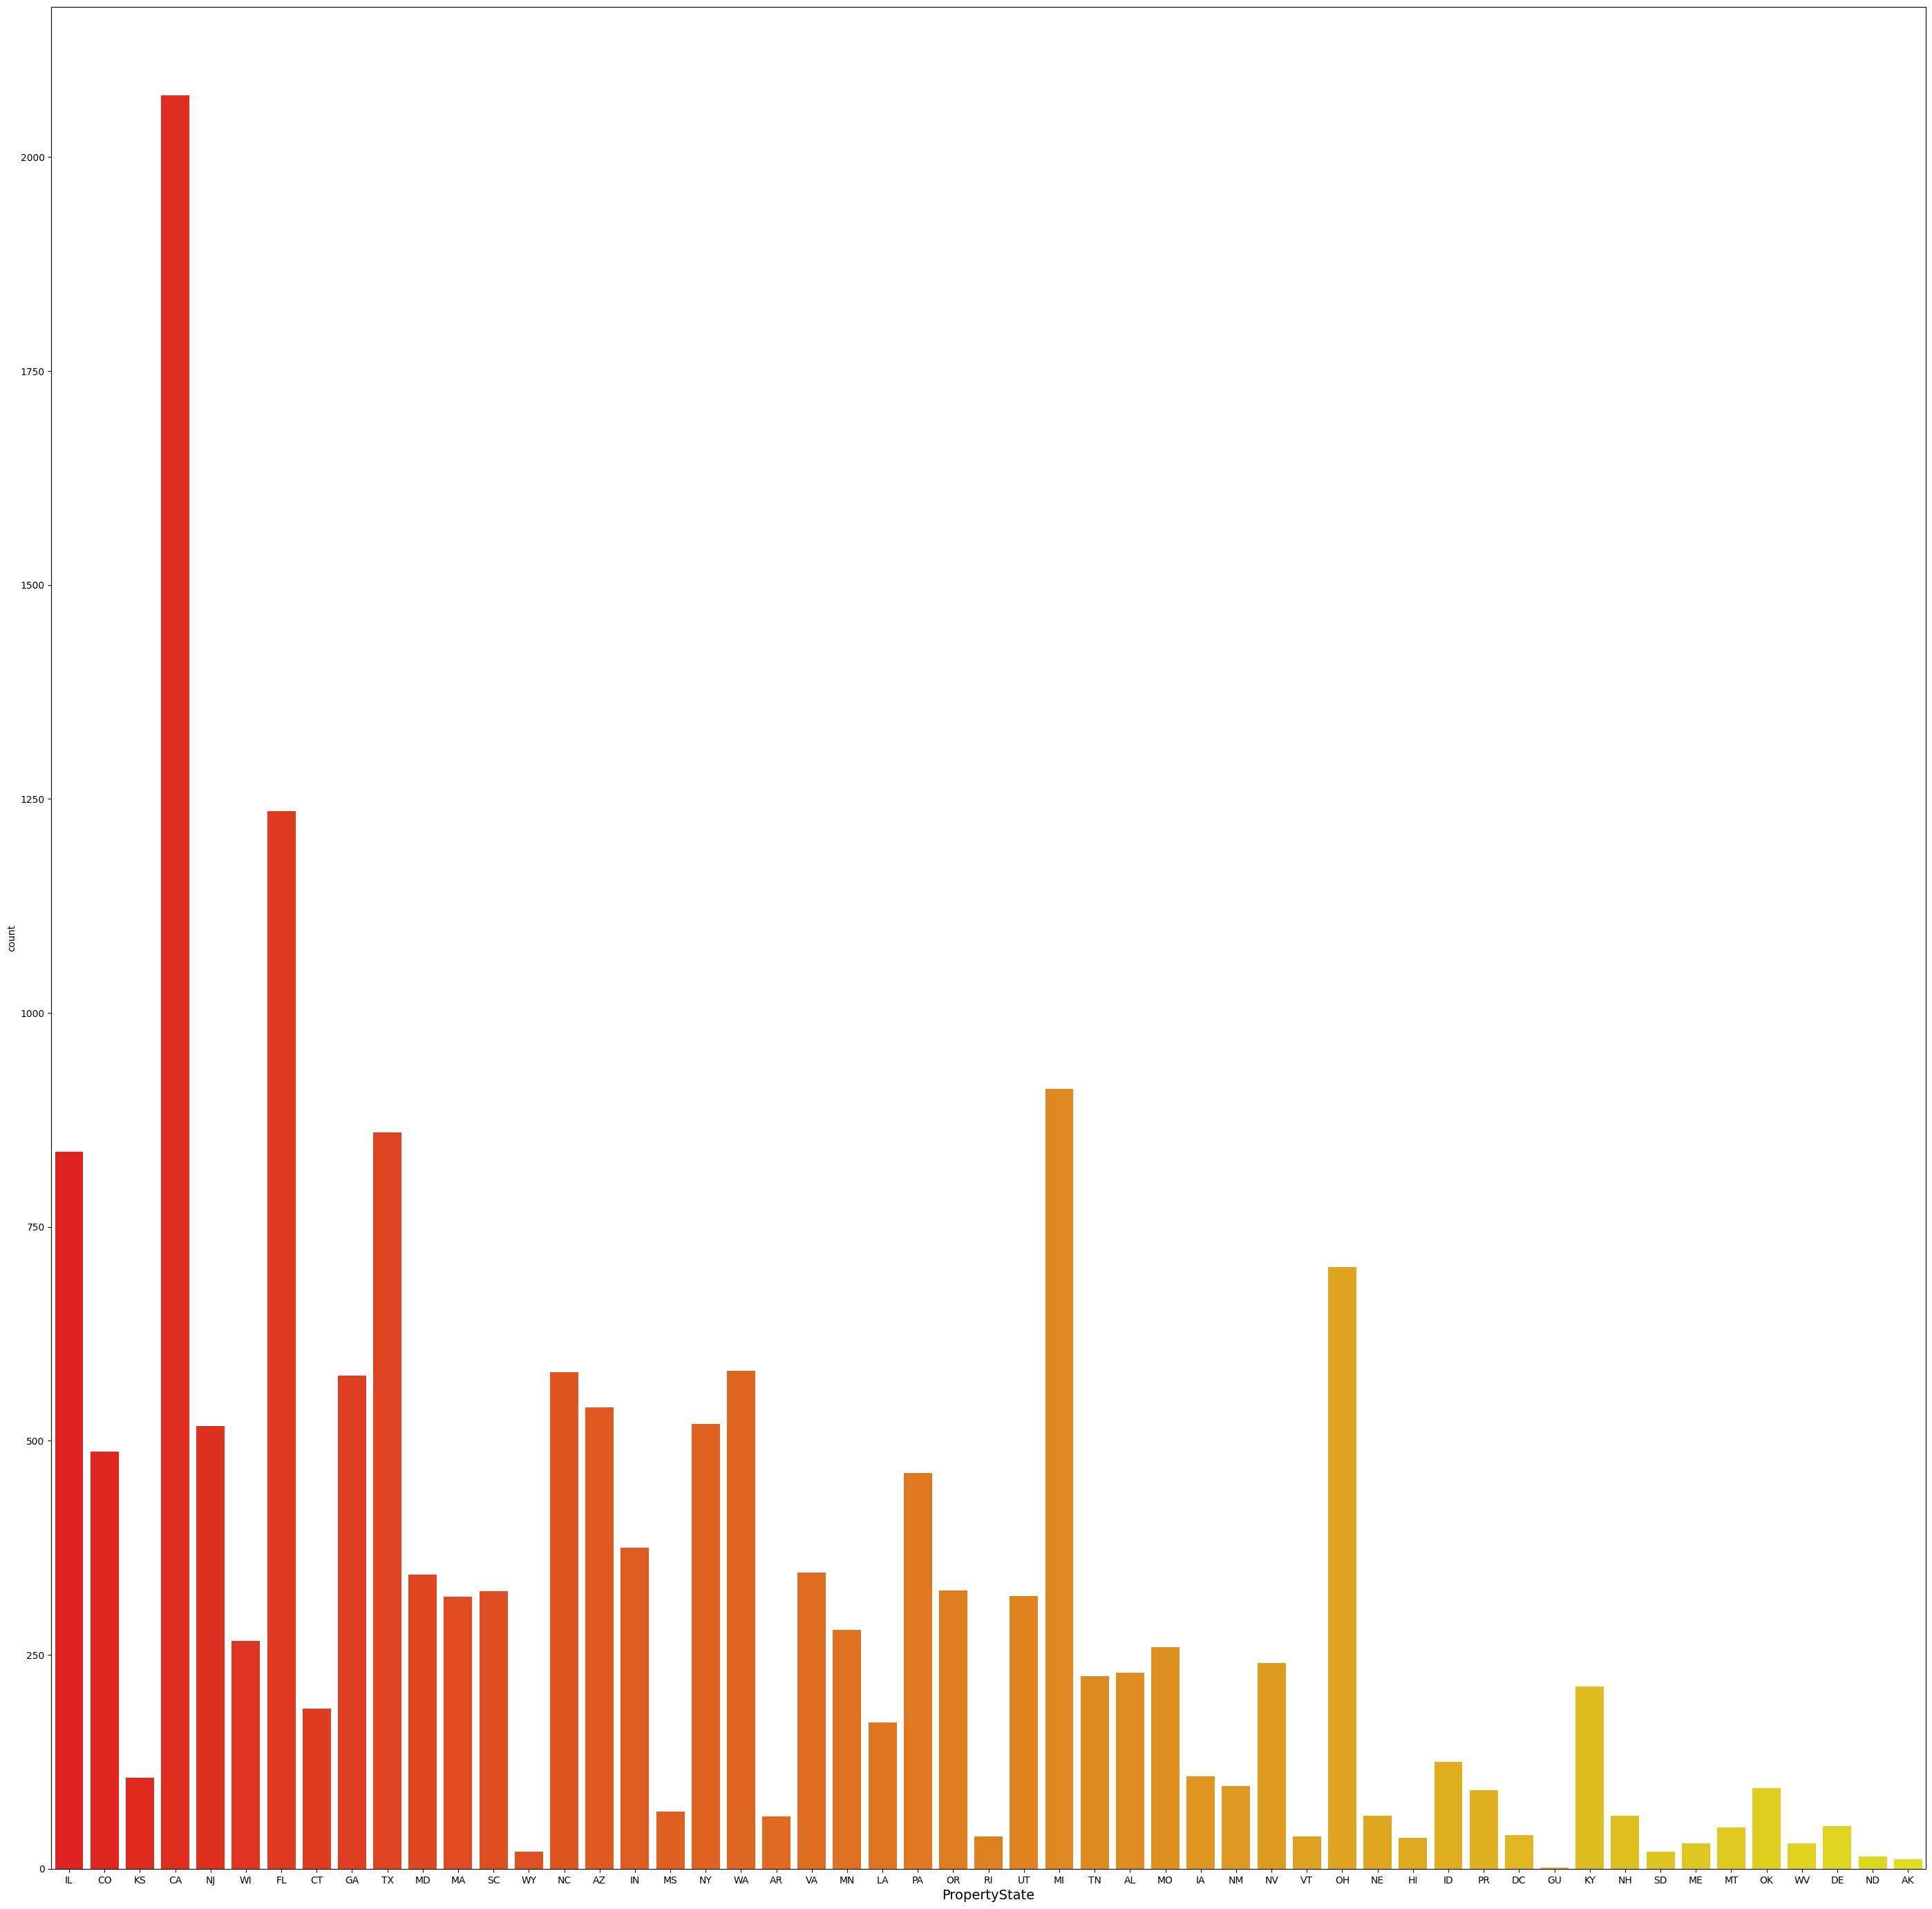

In [51]:
plt.figure(figsize=(35,35))
sns.countplot(x='PropertyState',data=data,palette="autumn")
plt.xlabel("PropertyState",fontsize=14)
plt.show()

In [54]:
#convert LoanPurpose and FirstTimeHomebuyer to numerical data by get_dummies function
encoded_data = pd.get_dummies(data['LoanPurpose'], prefix='LoanPurpose')
encoded_data2 = pd.get_dummies(data['FirstTimeHomebuyer'], prefix='FirstTimeHomebuyer')
data_temp = pd.concat([data, encoded_data], axis=1)
data=pd.concat([data_temp,encoded_data2], axis =1)
data.drop('LoanPurpose', axis=1,inplace=True)
data.drop('FirstTimeHomebuyer', axis =1 , inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Quick Feature Engineering

In [55]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MSA', 'MIP',
       'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_N',
       'FirstTimeHomebuyer_X', 'FirstTimeHomebuyer_Y'],
      dtype='object')

In [56]:
data.drop(['FirstTimeHomebuyer_X','FirstTimeHomebuyer_N','ServicerName','SellerName','NumBorrowers','PropertyType','PropertyState','ProductType','PPM','Channel','Occupancy','MSA','MaturityDate','FirstPaymentDate'], inplace=True,axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             0
MIP                     0
Units                   0
OCLTV                   0
DTI                     0
OrigUPB                 0
LTV                     0
OrigInterestRate        0
PostalCode              0
LoanSeqNum              0
OrigLoanTerm            0
EverDelinquent          0
MonthsDelinquent        0
MonthsInRepayment       0
LoanPurpose_C           0
LoanPurpose_N           0
LoanPurpose_P           0
FirstTimeHomebuyer_Y    0
dtype: int64

In [58]:
data.isnull().sum()*100/data.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             0.0
MIP                     0.0
Units                   0.0
OCLTV                   0.0
DTI                     0.0
OrigUPB                 0.0
LTV                     0.0
OrigInterestRate        0.0
PostalCode              0.0
LoanSeqNum              0.0
OrigLoanTerm            0.0
EverDelinquent          0.0
MonthsDelinquent        0.0
MonthsInRepayment       0.0
LoanPurpose_C           0.0
LoanPurpose_N           0.0
LoanPurpose_P           0.0
FirstTimeHomebuyer_Y    0.0
dtype: float64

In [59]:
data.drop(['PostalCode','LoanSeqNum'], axis=1,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16552 entries, 0 to 16551
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           16552 non-null  int64  
 1   MIP                   16552 non-null  int64  
 2   Units                 16552 non-null  int64  
 3   OCLTV                 16552 non-null  int64  
 4   DTI                   16552 non-null  int64  
 5   OrigUPB               16552 non-null  int64  
 6   LTV                   16552 non-null  int64  
 7   OrigInterestRate      16552 non-null  float64
 8   OrigLoanTerm          16552 non-null  int64  
 9   EverDelinquent        16552 non-null  int64  
 10  MonthsDelinquent      16552 non-null  int64  
 11  MonthsInRepayment     16552 non-null  int64  
 12  LoanPurpose_C         16552 non-null  bool   
 13  LoanPurpose_N         16552 non-null  bool   
 14  LoanPurpose_P         16552 non-null  bool   
 15  FirstTimeHomebuyer_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,False,False,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,False,True,False,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,False,True,False,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,False,True,False,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,False,True,False,False


In [62]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000
mean,557.343886,13.005498,1.024770,81.222994,30.673635,121297.547124,81.209763,7.046669,359.771750,0.438316,6.388956,63.281054
std,156.914538,13.272688,0.189738,12.664849,12.621718,52247.683283,12.665664,0.427952,2.656448,0.496195,16.542463,50.235576
min,0.000000,0.000000,1.000000,7.000000,0.000000,13000.000000,7.000000,4.875000,306.000000,0.000000,0.000000,1.000000
25%,584.000000,0.000000,1.000000,75.000000,24.000000,80000.000000,75.000000,6.875000,360.000000,0.000000,0.000000,33.000000
50%,607.000000,12.000000,1.000000,80.000000,32.000000,115000.000000,80.000000,7.000000,360.000000,0.000000,0.000000,49.000000
75%,618.000000,25.000000,1.000000,90.000000,39.000000,155000.000000,90.000000,7.250000,360.000000,1.000000,4.000000,68.000000
max,625.000000,52.000000,4.000000,103.000000,65.000000,400000.000000,100.000000,10.500000,360.000000,1.000000,180.000000,212.000000


In [63]:
data.corr()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y
CreditScore,1.000000,0.012596,-0.057733,0.032975,0.063397,0.040740,0.033102,0.003907,0.007257,0.084809,0.041886,-0.025115,0.051640,0.102788,-0.139993,-0.081961
MIP,0.012596,1.000000,-0.049357,0.771269,0.078600,0.064286,0.771887,0.103030,0.000896,0.024588,0.020541,-0.108767,-0.342943,-0.173141,0.420653,0.255006
Units,-0.057733,-0.049357,1.000000,-0.068702,-0.004092,0.050080,-0.068561,0.036093,-0.000170,0.004679,-0.011020,0.010090,0.012010,0.013749,-0.022410,-0.000934
OCLTV,0.032975,0.771269,-0.068702,1.000000,0.050673,0.124314,0.999425,0.046353,-0.000547,0.029681,0.032158,-0.097320,-0.384197,-0.148286,0.425612,0.251769
DTI,0.063397,0.078600,-0.004092,0.050673,1.000000,0.083267,0.050624,0.099235,0.046582,0.009211,0.018618,-0.019481,-0.007309,-0.045142,0.050382,0.050316
OrigUPB,0.040740,0.064286,0.050080,0.124314,0.083267,1.000000,0.124068,-0.083496,-0.009014,-0.071253,-0.092517,-0.199404,-0.091544,0.031146,0.034990,-0.044736
LTV,0.033102,0.771887,-0.068561,0.999425,0.050624,0.124068,1.000000,0.046684,-0.000637,0.030026,0.032504,-0.097582,-0.384628,-0.147970,0.425608,0.251800
OrigInterestRate,0.003907,0.103030,0.036093,0.046353,0.099235,-0.083496,0.046684,1.000000,-0.022592,0.042851,0.037360,-0.114515,0.034474,-0.026267,0.001349,0.013304
OrigLoanTerm,0.007257,0.000896,-0.000170,-0.000547,0.046582,-0.009014,-0.000637,-0.022592,1.000000,0.006965,0.010813,0.016343,0.024643,-0.051355,0.033515,0.025373
EverDelinquent,0.084809,0.024588,0.004679,0.029681,0.009211,-0.071253,0.030026,0.042851,0.006965,1.000000,0.437216,0.277740,0.031442,0.019706,-0.042395,-0.025248


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


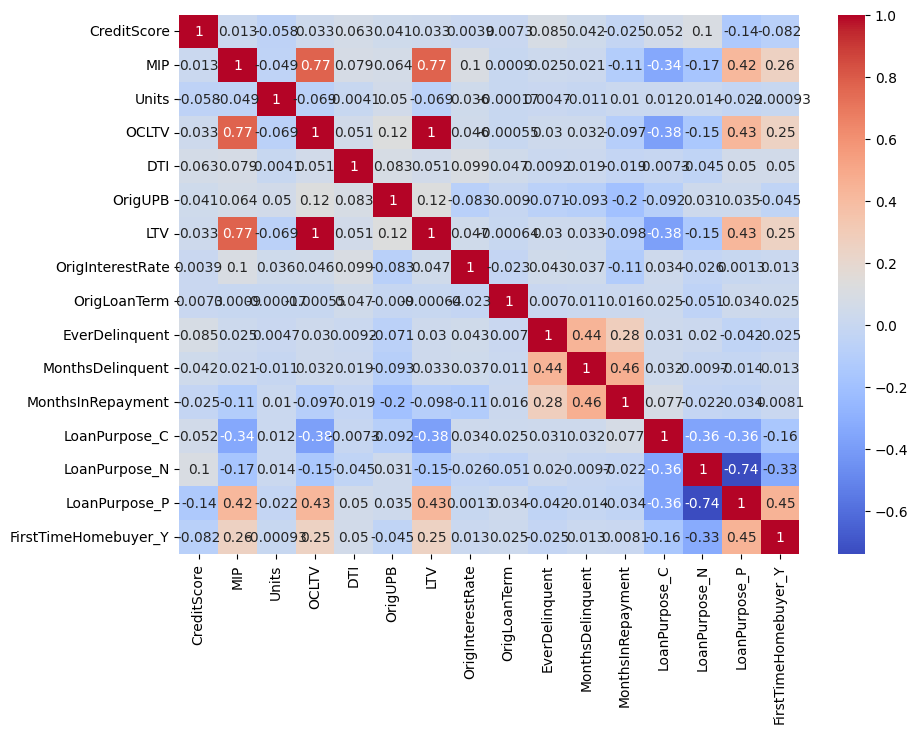

In [64]:
corr_matrix = data.corr()

# Set figure size
plt.figure(figsize=(10,7))

# Create heatmap with correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

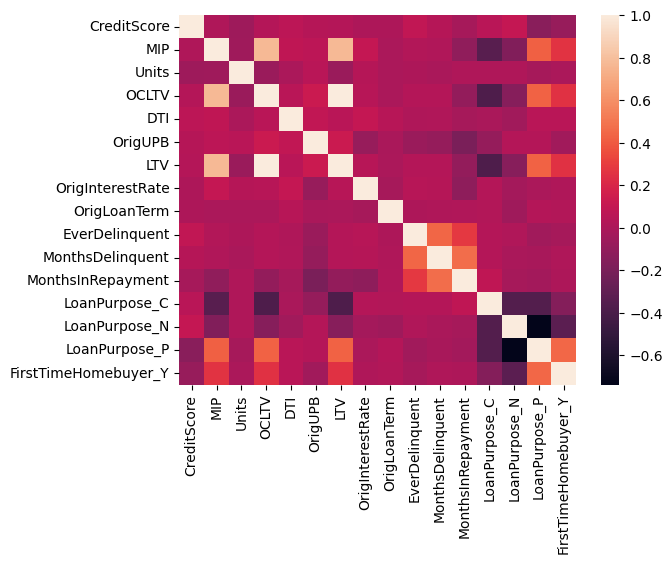

In [65]:
sns.heatmap(data.corr(),cmap='rocket')

## Handling Outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

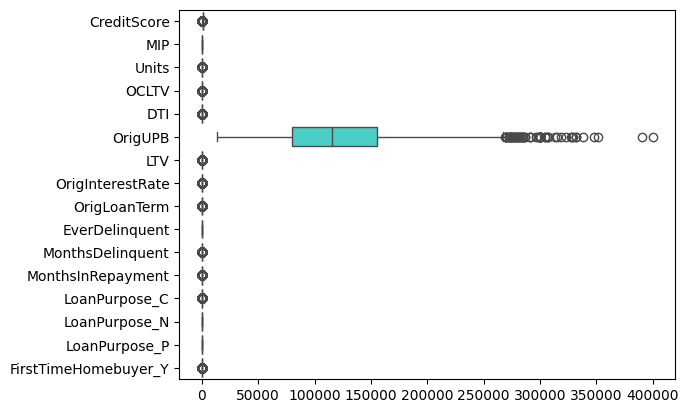

In [66]:
sns.boxplot(data=data,palette='rainbow',orient='h')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


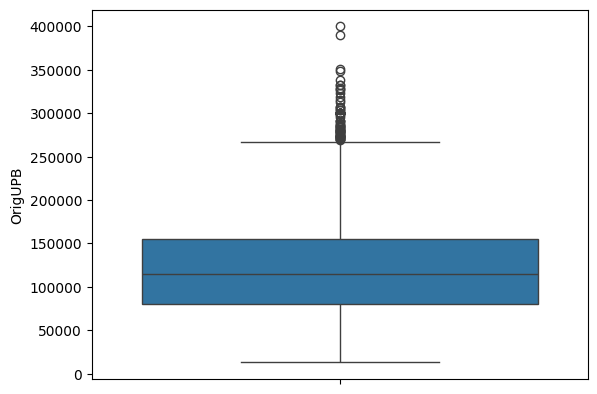

In [67]:
draw_boxplot('OrigUPB')

In [68]:
upp,low=handle_outlier(data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
data['OrigUPB']=np.where(data['OrigUPB']>upp,upp,data['OrigUPB'])
data['OrigUPB']=np.where(data['OrigUPB']<low,low,data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


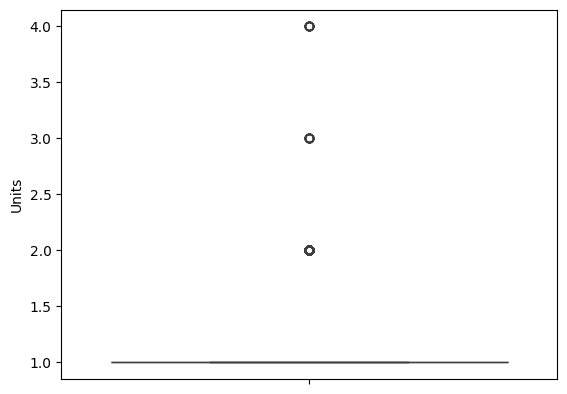

In [70]:
draw_boxplot('Units')

In [71]:
upper,lower=handle_outlier(data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
data['Units']=np.where(data['Units']>upper,upper,data['Units'])
data['Units']=np.where(data['Units']<lower,lower,data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


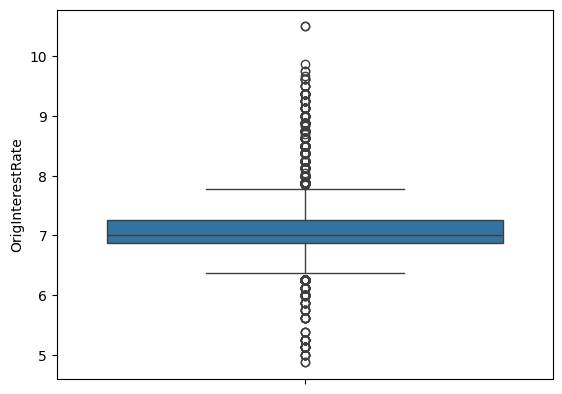

In [73]:
draw_boxplot('OrigInterestRate')

In [74]:
uppero,lowero=handle_outlier(data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
data['OrigInterestRate']=np.where(data['OrigInterestRate']>uppero,uppero,data['OrigInterestRate'])
data['OrigInterestRate']=np.where(data['OrigInterestRate']<lowero,lowero,data['OrigInterestRate'])

#checking for duplicates values to drop them
duplicate=data.duplicated()
print(duplicate.sum())

31


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
data=data.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
duplicate=data.duplicated()
print(duplicate.sum())

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## New Data Visualisation


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

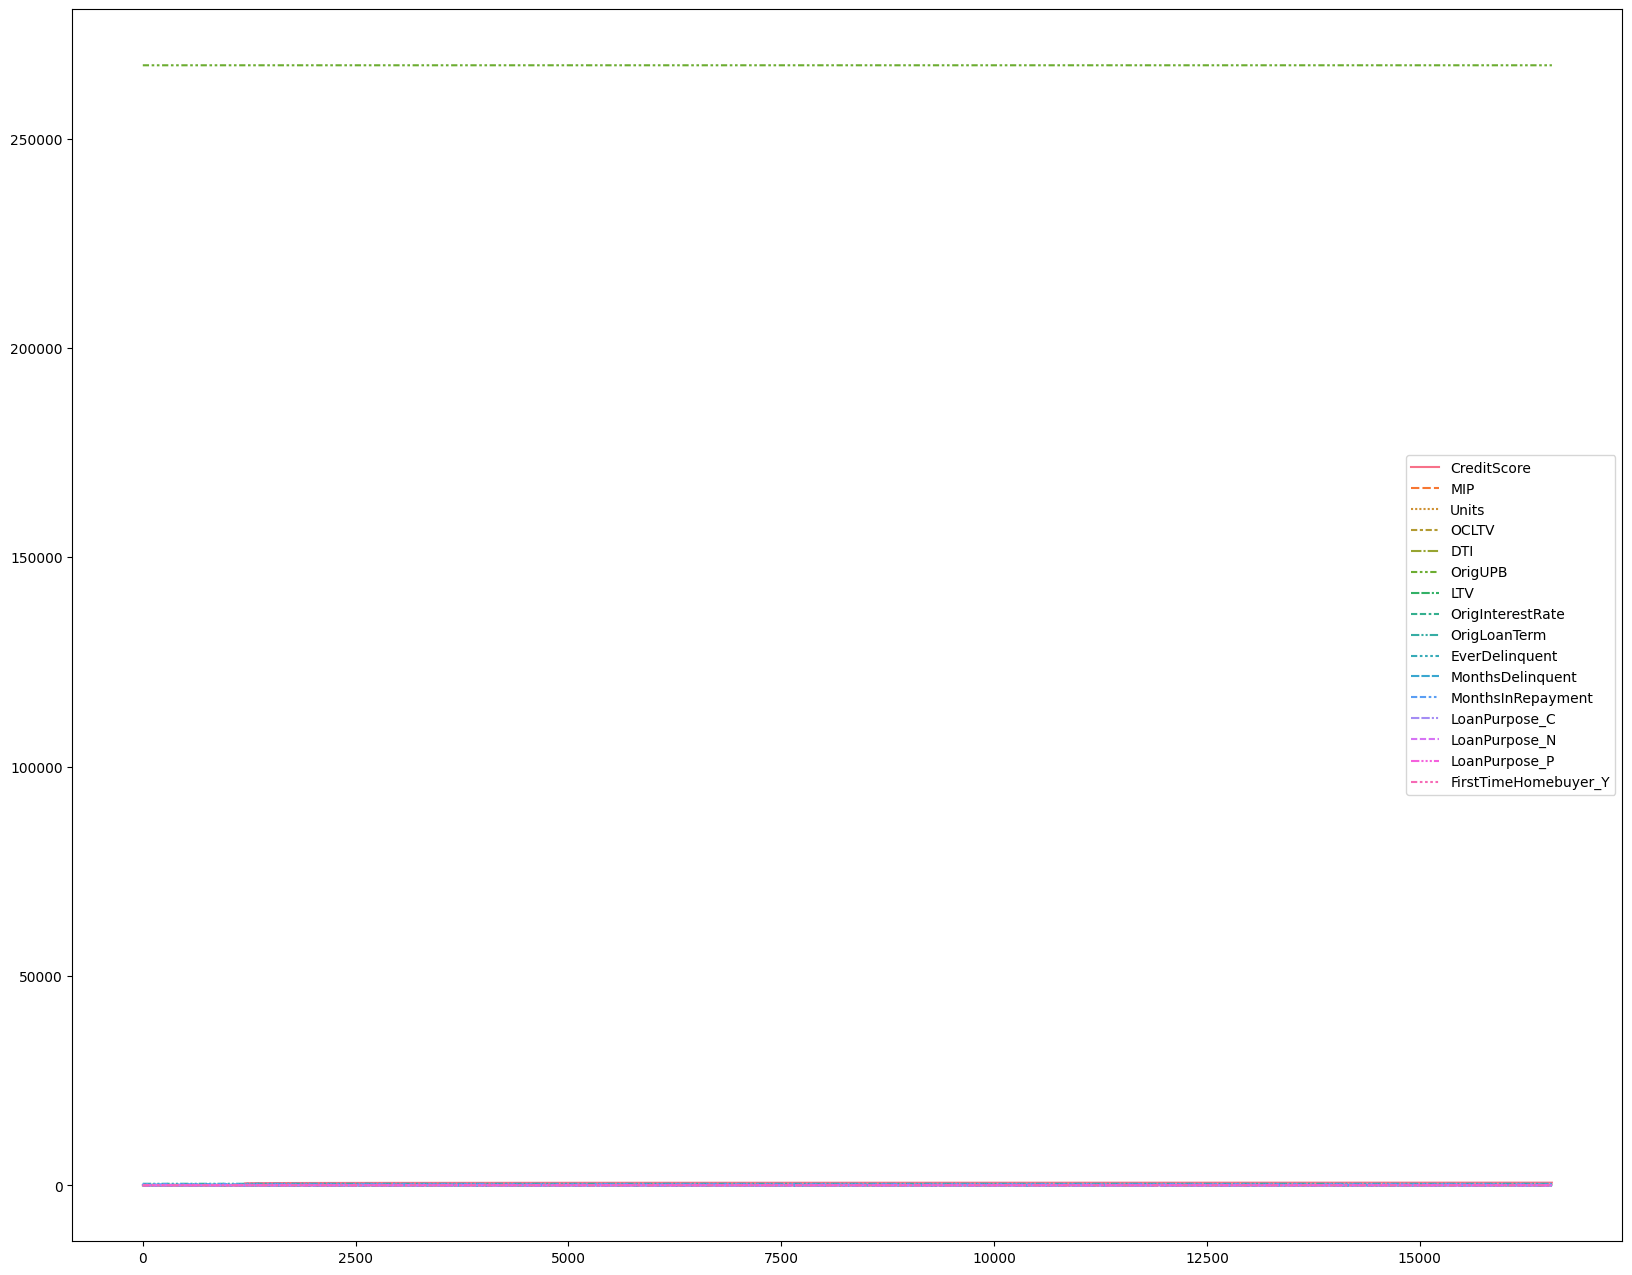

In [78]:
plt.figure(figsize=(20,16))
sns.lineplot(data=data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


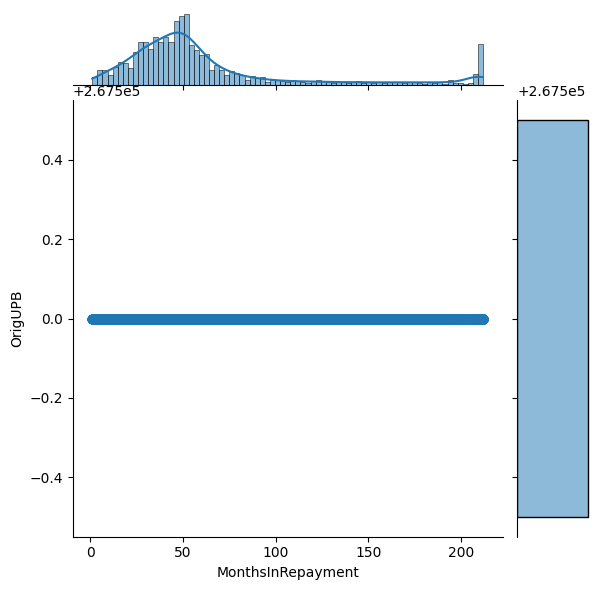

In [79]:
draw_join_plot(data['MonthsInRepayment'],data['OrigUPB'])

In [80]:
data['EverDelinquent'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1])

In [81]:
data['EverDelinquent'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EverDelinquent
0    9266
1    7255
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


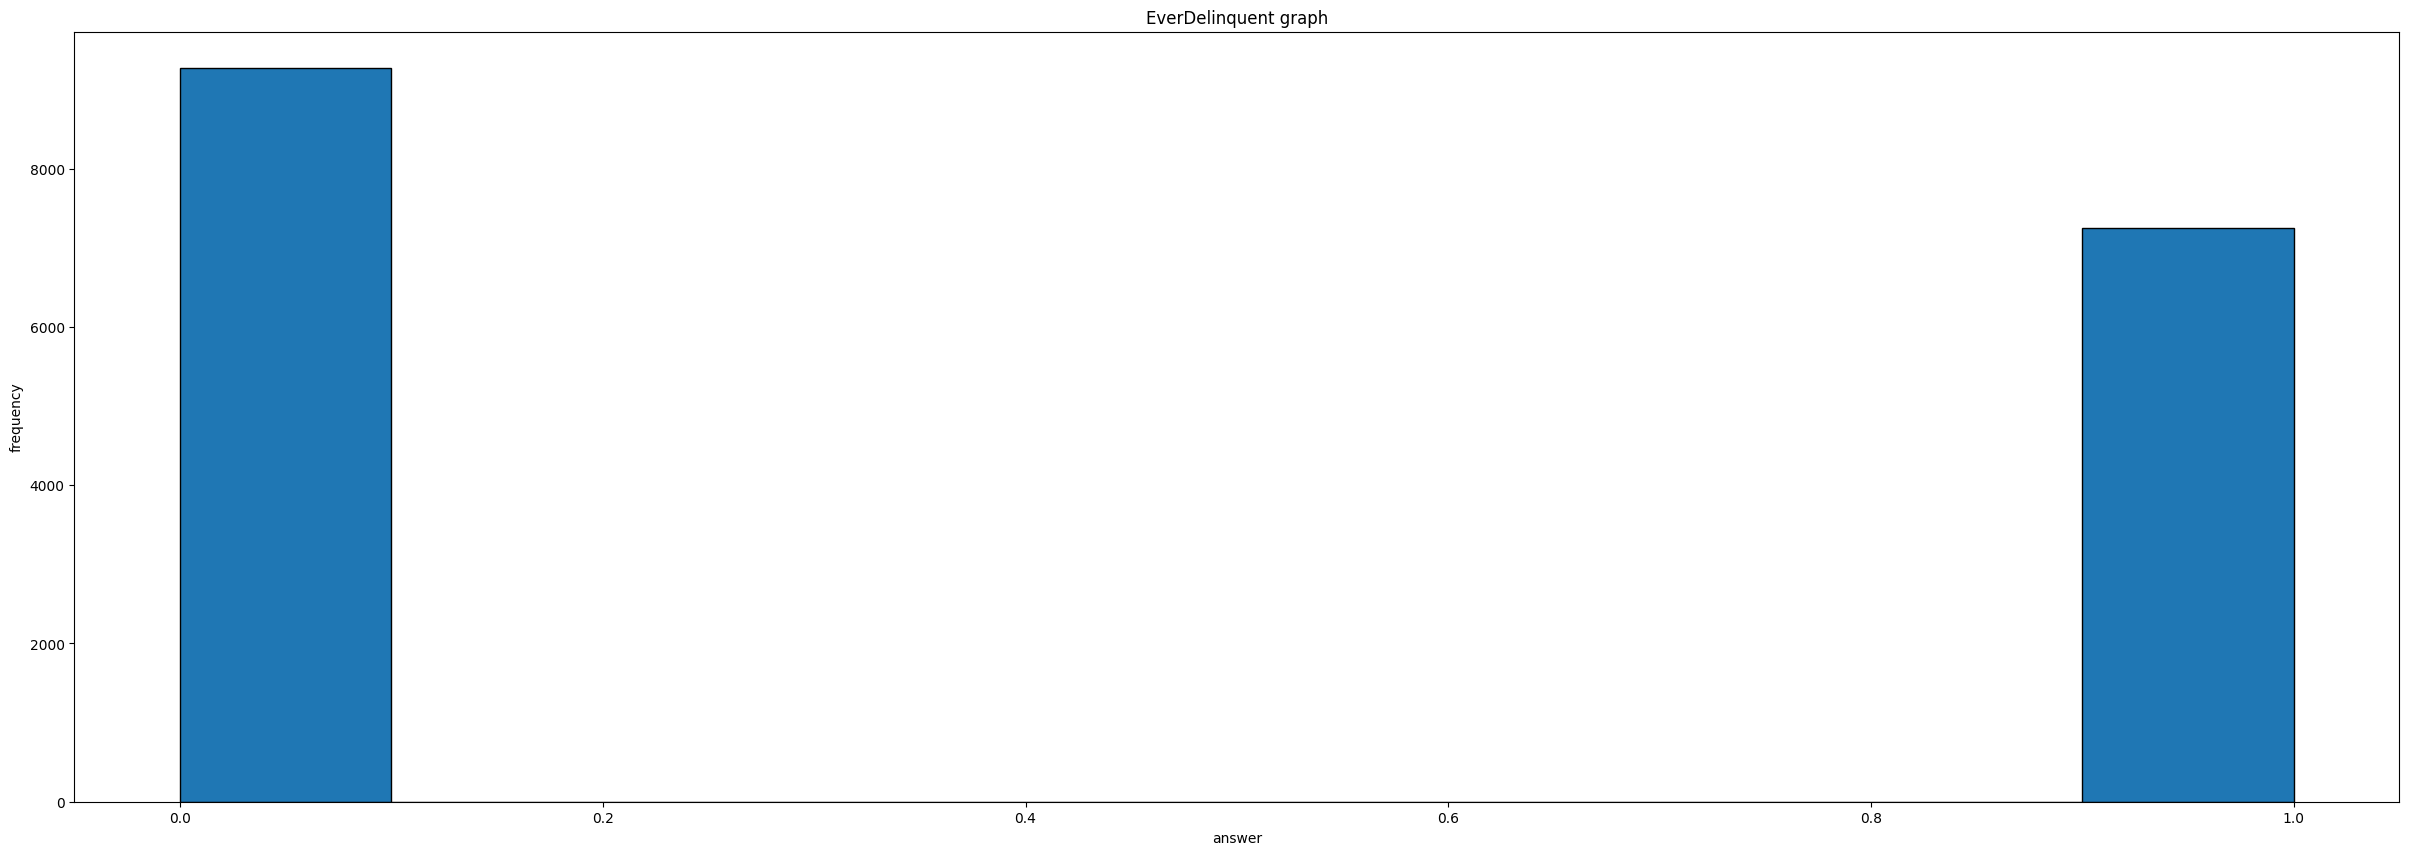

In [82]:
draw_histogram('EverDelinquent','EverDelinquent graph','answer','frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


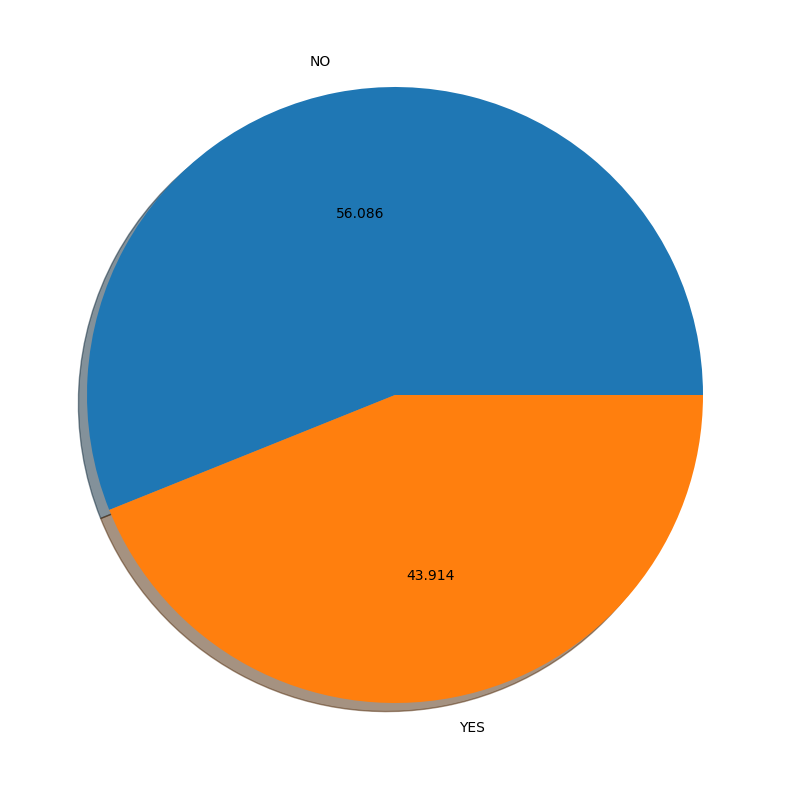

In [83]:
labels=['NO','YES']
draw_piechart('EverDelinquent',labels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-84-323f35642329>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


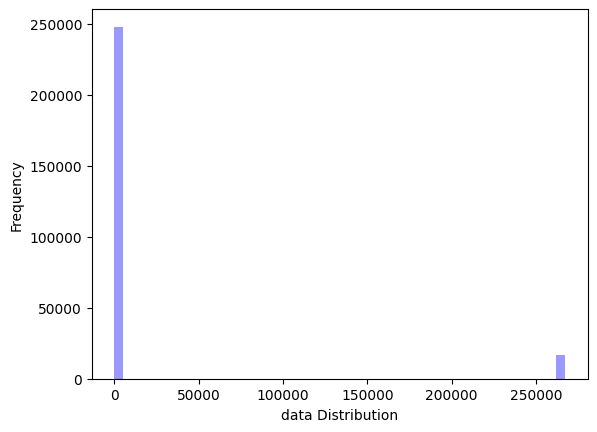

In [84]:
ax = sns.distplot(data,
                  kde=False,
                  color='blue')
ax.set(xlabel='data Distribution', ylabel='Frequency')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-85-07ab57209f09>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


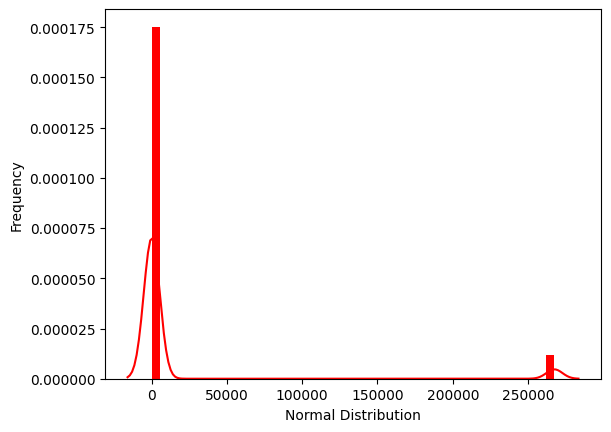

In [85]:
import scipy.stats as stats
ax = sns.distplot(data,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

In [88]:
import plotly.express as px
from sklearn.decomposition import PCA


n_components = 5

pca = PCA(n_components=n_components)
components = pca.fit_transform(data)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=data['EverDelinquent'],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

Streaming output truncated to the last 5000 lines.
<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.f